In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import scipy.io as sio

In [8]:
matfile = sio.loadmat("../data/sampleEEGdata")
EEG = matfile["EEG"][0,0]
EEG["times"] = EEG["times"][0]

In [9]:
erp = np.mean(EEG["data"],axis=2)
data = copy.deepcopy(erp)

for ci in range(int(EEG["nbchan"])):
    data[ci,:] -= np.mean(data[ci,:])

covd = data@data.T / (int(EEG["pnts"])-1)

evals,evecs = np.linalg.eig( covd )

soidx = np.argsort(evals)
soidx = soidx[::-1]
evals = evals[soidx]
evecs = evecs[:,soidx]

evals = 100*evals / np.sum(evals)

pc_timeseries = evecs[:,0].T @ erp

C:\Users\kerem\AppData\Local\Temp\ipykernel_14116\3892492851.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for ci in range(int(EEG["nbchan"])):
C:\Users\kerem\AppData\Local\Temp\ipykernel_14116\3892492851.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  covd = data@data.T / (int(EEG["pnts"])-1)


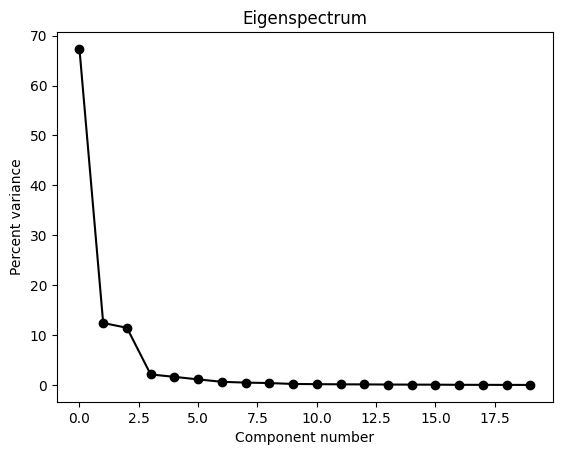

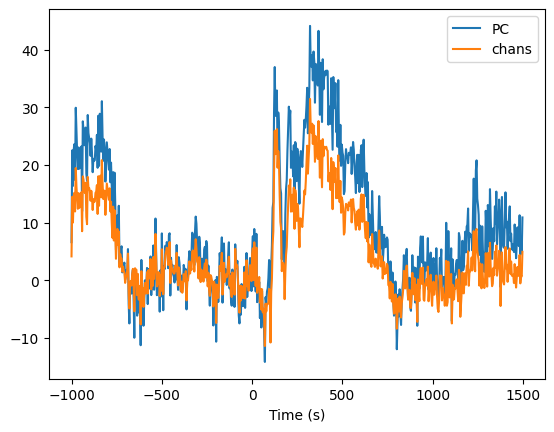

In [10]:
plt.plot(evals[:20],"ko-")
plt.title("Eigenspectrum")
plt.ylabel("Percent variance")
plt.xlabel("Component number")
plt.show()


plt.plot(EEG["times"],pc_timeseries,label="PC")
plt.plot(EEG["times"],np.mean(erp[[19,32,20],:],axis=0)*5,label="chans")
plt.legend()
plt.xlabel("Time (s)")
plt.show()